##  Can Ertaş

# LOGISTIC REGRESSION

### 1. Data Loading and Exploration

##### Data is from the Bank Marketing dataset https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\can00\Desktop\Assignment_2\portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")

### 2. Calculating correlation between target variable 'y' and other features (5 points)

In [3]:
correlation_with_y = df.corr()['y'] #calculate correlations
correlation_with_y = correlation_with_y.drop(labels='y') #but not the correlation between y and itself
print(correlation_with_y)

age            0.040038
job            0.022716
marital       -0.062501
education      0.082672
default       -0.035414
balance        0.088308
housing       -0.213409
loan          -0.118816
contact        0.219086
day_of_week   -0.042603
month          0.031213
duration       0.443087
campaign      -0.133147
pdays          0.153807
previous       0.087656
poutcome       0.291850
Name: y, dtype: float64


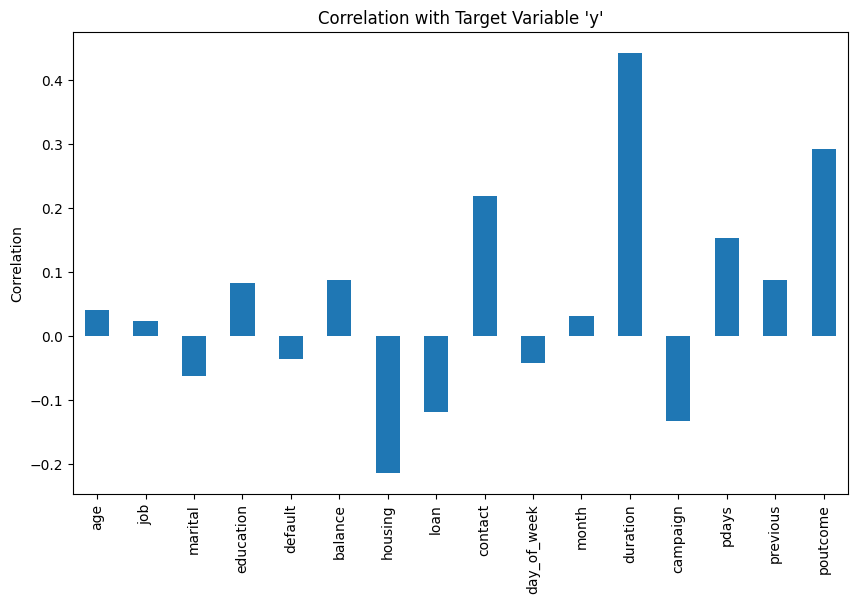

In [4]:
correlation_with_y.plot(kind='bar',
                        figsize=(10, 6),
                        title="Correlation with Target Variable 'y'")  # visualize the corr. with y
plt.ylabel('Correlation')
plt.show()

# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choosing the two most correlated features with target feature 'y'

In [5]:
X = df[["duration", "poutcome"]]  # choosing the most correlated features 
y = df['y'] # and the target

###  * Define your logistic regression model as class without using any built-in libraries
### * Defining necessary functions such as sigmoid, fit, predict

In [ ]:
class LogisticRegresion:
    def __init__(self, lr, iters):
        self.lr = lr
        self.iters = iters
        self.weights = None  # will be adjusted later depending on the shape of the train data
        self.bias = 0.1

    def sigmoid(self, z):  # returns the prob. that a value will be in class 2
        return 1 / (1 + np.exp(-z))

    def predict(self, X_test):  # X_test is the data
        z_values = np.dot(X_test, self.weights) + self.bias  # a np array of wx + b values of corresponding x inputs
        y_prob = self.sigmoid(z_values)  # a np array of probabilites that customers will be in class 2

        # a np array of 1s and 2s indicating the predicted class of corresponding inputs in X_test
        y_predicted = np.where(y_prob > 0.5, 2, 1)
        return y_predicted


    # fit function that will calculate the final weights and bias
    # X and y numpy arrays of our train data
    def fit(self, X_train, y_train):
        sample_num, feature_num = X_train.shape
        self.weights = np.zeros(feature_num)
        for _ in range(self.iters):

            pred = self.predict(X_train)
            differences = (pred - y_train)  # [a, b, c] form
            reshaped_diff = differences.reshape(-1, 1)  # reshaped to [[a], [b], [c]] form

            # computing gradients
            dw = (1/sample_num) * np.sum(X_train * reshaped_diff, axis=0)  # (1/size) * x(n)((y(x(n))- t(n)) for all x(n)s
            db = (1/sample_num) * np.sum(differences)   # (1/size)*(y(x(n) - t(n)) for all x(n)s

            # updating the weights and the bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

###   Function for plotting the decision boundary

In [52]:
import seaborn as sns

def plot_dec_bound(model, X, feature1, feature2, y, resolution=0.01):
    # as we did in PA1
    X_df = pd.DataFrame(X, columns=[feature1, feature2])
    y_df = pd.DataFrame(y, columns=['class'])
    y_df = y_df.reset_index(drop=True)
    frames = [X_df, y_df]
    data = pd.concat(frames, axis=1)

    sns.scatterplot(x=feature1, y=feature2, hue="class", data=data, palette='Set1', edgecolor='w', s=30)

    min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1

    x1grid = np.arange(min1, max1, resolution)
    x2grid = np.arange(min2, max2, resolution)

    xx, yy = np.meshgrid(x1grid, x2grid)
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Standardizing the grid because we put unscaled data
    scaler_plot = StandardScaler().fit(X)
    grid = scaler_plot.transform(grid)

    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap='coolwarm_r', alpha=0.3)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Decision Boundary')

    plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

Splitting the dataset into a training set and a validation set (80% training and 20% validation).

In [8]:
# LOGISTIC REGRESSION TWO MOST CORR. PART START #
from sklearn.model_selection import train_test_split  # to split the data easily
X_np = X.to_numpy()  #two most correlated
y_np = y.to_numpy()  #two most correlated
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)


Scaling the features using StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initializing and train the custom logistic regression model

In [10]:
log_reg = LogisticRegresion(lr=0.1, iters=8000) # initialize logistic regressor
log_reg.fit(X_train_scaled, y_train)  # train the data


Making predictions on the validation set

In [11]:
predictions = log_reg.predict(X_test_scaled) # predict

### Evaluating the model's performance, printing classification report and confusion matrix

We got a reasonably good score of accuracy : 74% using the most correlated features with target value y. We also have similar average results in terms of precision, recall, and f1-score with averages about 75%.

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nClassification Report:\n", classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.64      0.72      1092
           2       0.69      0.86      0.77      1024

    accuracy                           0.74      2116
   macro avg       0.76      0.75      0.74      2116
weighted avg       0.76      0.74      0.74      2116

Confusion Matrix:
[[697 395]
 [145 879]]


### Printing decision boundaries

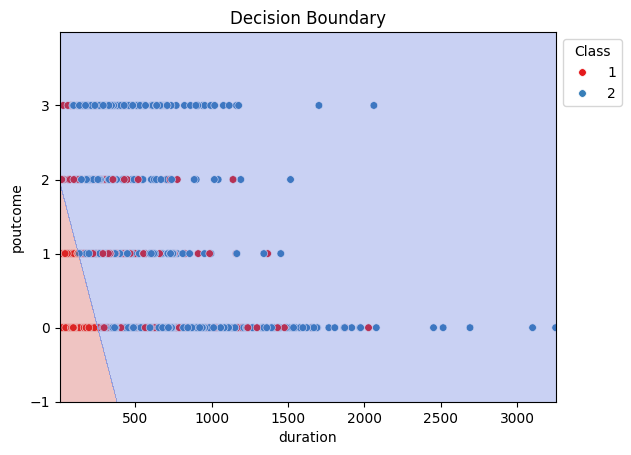

In [53]:
plot_dec_bound(log_reg, X_test, "duration", "poutcome",  y_test)
# LOGISTIC REGRESSION TWO MOST CORR. PART DONE #

# 1.2 Implementing Logistic Regression using all features.

Redefining input and target variables. In this experiment, you will use all input features in the dataset.

In [14]:
# LOGISTIC REGRESSSION ALL FEATURES PART START #
X2 = df.iloc[:, :-1].values  # Select all features
y2 = df.iloc[:, -1].values   # Select labels

Splitting the dataset into a training set and a validation set (80% training and 20% validation).

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


Scaling the features using StandardScaler

In [16]:
# Scale the features using the scaler previously defined
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

### Initializing and training the custom logistic regression model.

In [17]:
log_reg2 = LogisticRegresion(lr=0.1, iters=8000)
log_reg2.fit(X_train_scaled2, y_train2)


Making predictions on the validation set

In [18]:
predictions2 = log_reg2.predict(X_test_scaled2)

### Evaluating the model's performance, printing classification report and confusion matrix  (5 points)

Again the results for all metrics are similar, however this time the score is lower: about 70%.

In [19]:
print("\nClassification Report:\n", classification_report(y_test2, predictions2))
conf_matrix2 = confusion_matrix(y_test2, predictions2)
print("Confusion Matrix:")
print(conf_matrix2)
# LOGISTIC REGRESSSION ALL FEATURES PART START #
########################### LOG. REG. DONE #########################


Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.82      0.74      1092
           2       0.75      0.58      0.66      1024

    accuracy                           0.70      2116
   macro avg       0.71      0.70      0.70      2116
weighted avg       0.71      0.70      0.70      2116

Confusion Matrix:
[[895 197]
 [429 595]]


### Briefly explaining the impact of the number of features on the learning ability of the model.

Increasing the number of features does not always result in improved performance of the model. One should choose the most correlating features with the class rather than using all the parameters.